# Pohyb s odporem vzduchu 1
Když jsme počítali příklady na vrhy a pády, vždy se řeklo "zanedbejte odpor vzduchu". Skoro nikdy se ale neřešilo, zda je odpor vzduchu skutečně tak malý, aby byl zanedbatelný. Pravda je, že často vůbec zanedbatelný není, na což se právě podíváme.

Budeme řešit nejprve pohyb v 1D, tedy po přímce. To je třeba svislý volný pád. Později přejdeme ke 2D pohybu, což je pohyb v rovině, třeba šikmý vrh granátem, let Messiho centru a tak podobně.

## Pohyb po přímce (1D)
Pohyb tělesa řízen 2. Newtonovým zákonem, který představuje takzvanou pohybovou rovnici.
$$ a = \frac{F}{m}$$
V nejjednodušších případech je síla F konstatní, jako třeba při volném pádu z malé výšky bez odporu vzduchu, kdy $F = mg$. Síla ale během pohybu nemusí být vůbec konstantní. Do síly se totiž může promítat odpor vzduchu, který závisí na rychlosti tělesa. Nebo by se třeba mohlo jednat o pohyb nějakého asteroidu, na který bude při přibližování k Zemi působit čím dál větší gravitační síla v závislosti na jeho aktuální poloze.

Tak či tak víme, že platí $a=\Delta v/\Delta t$, neboli také $\Delta v = a\Delta t$. A dále $v = \Delta x/\Delta t$, odkud $\Delta x = v\Delta t$.

Poloha, rychlost a zrychlení se během pohybu nějak mění. V určitou chvíli (v čase $t$) je pohyb tělesa popsán třemi čísly: $x,v,a$. Pak se v čase posuneme o malý kousek do času $t' = t + \Delta t$, přičemž $\Delta t$ je třeba setina sekundy. Předpokládáme, že v průběhu této kratičké setiny sekundy se $x$, $v$ a $a$ změnili jen maličko. Jejich nové hodnoty $x'$,$v'$,$a'$ pak můžeme z těch původních přibližně určit jako
$$ x' = x + v\Delta t $$
$$ v' = v + a\Delta t $$
$$ a' = F(x',v')/m $$

Výraz $F(x',v')$ vyjadřuje, že síla působící na těleso může záviset na poloze tělesa nebo i na jeho rychlosti.
To zní možná abstraktně. Vezměme si tedy první konkrétní případ, a sice svislý pád z malé výšky s odporem vzduchu.



## Volný pád bez odporu vzduchu

Všichni víme, jakými pravidly se řídí volný pád bez odporu vzduchu. Pohybová rovnice je
$$ a = \frac{F}{m} = \frac{mg}{m} = g$$
Síla ani zrychlení tedy nezávisí na poloze tělesa ani jeho rychlosti. To vede ke vztahům $v(t) = v_0 + gt$ a potažmo $s=s_0 + v_0 t + \frac{1}{2}gt^2$. Orientujme kladný směr přirozeně ve směru vzhůru. Potom rychlost a zrychlení budou mít záporné znaménko, když míří směrem dolů. Při nulové počáteční rychlosti pak máme $v(t)=-gt$ a $y(t) = y_0 - \frac{1}{2}gt^2$. Připomeňte si, jak se tyto vztahy odvodí na základě počítání obsahu plochy pod grafem $v(t)$.

Řekněme ale, že tyto vztahy neznáme a že použijeme pouze uvedenou techniku postupných malých změn času a počítání, jak se postupně vyvíjí $y$ a $v$. V tomto jednoduchém případě máme
$$ y' = y + v\Delta t $$
$$ v' = v + a\Delta t $$
$$ a' = a = -g $$
tedy zrychlení konstantní. Nyní si numericky vypočítáme časový vývoj $y$ a $v$ pomocí jednoduché programové smyčky, kde se v každé iteraci posune čas o malé $\Delta t$. V každém kroku máme určité aktuální hodnoty $y$ , $v$, $a$, ze kterých vypočítáme nové hodnoty v pozdějším čase a takto postupujeme po krocích dál a dál.

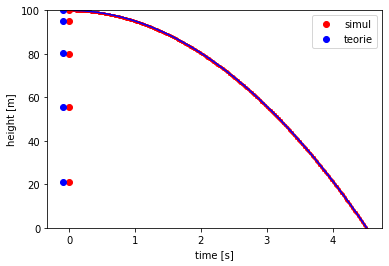

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# mic nechame padat z vysky 100 m a jen ho upustime, tedy pocatecni rychlost nulova
y0 = 100
v0 = 0
# vynulujeme stopky a nastavime nas prirustek casu, zde setinu sekundy
t = 0
dt = 0.01
# dalsi hodnoty
g = 9.8
# inicializace
y = y0
v = v0
data = []
# smycka
while y>0:
    a = -g # misto a bychom samozrejme vsude rovnou mohli psat -g, ale pro nazornost zde uvadime takto
    v = v + a*dt
    y = y + v*dt
    t = t + dt
    # pridat do 'tabulky' dalsi radek obsahujici aktualni udaje t,y,v,a
    data.append([t,y,v,a])
# konverze tabulky do numpy array a rozdeleni na sloupce. Ve sloupcich mame casovou radu poloh, rychlosti a zrychleni
tt,yy,vv,aa = np.hsplit(np.array(data),4)
# vypocitana poloha v case pomoci numericke simulace
plt.plot(tt,yy,'ro',markersize=2)
# teoreticka zavislost polohy na case
plt.plot(tt,y0-0.5*g*tt**2,'b-')
plt.xlabel('time [s]')
plt.ylabel('height [m]')
plt.ylim((0,y0))
#udelame vyber polohy kazdou sekundu a vykreslime
tt1 = tt[0:-1:np.int(1/dt)]
yy1 = yy[0:-1:np.int(1/dt)]
plt.plot(np.zeros(len(tt1)),yy1,'ro',label='simul')
plt.plot(np.zeros(len(tt1))-0.1,y0-0.5*g*tt1**2,'bo',label='teorie')
plt.legend()
plt.show()

### Cvičení 1
V předešlém kódu měňte velikost časového kroku a sledujte, co se děje s přesností numerické simulace oproti teoretické předpovědi. Vysvětlete.

## Svislý pád s odporem vzduchu
Velikost odporové síly vzduchu je dána vztahem
$$ F_o = \frac{1}{2}CS\rho_\mathrm{air}v^2 $$
Budeme uvažovat pád nějakého míče o hmotnosti $m=0.5\,\mathrm{kg}$ a poloměru $r=10\,\mathrm{cm}$. Pro kouli je tvarový faktor $C \approx 0.5$, a efektivní plocha průřezu $S = \pi r^2$, hustota vzduchu $\rho=1.3\,\mathrm{kg/m^3}$. 
Síla na míč pak dostává tvar $F(x,v) = -mg + \frac{1}{2}CS\rho v^2$. Nezávisí sice na poloze $y$, ale závisí na aktuální proměnlivé rychlosti $v$. Odporová síla má ve vztahu kladné zanménko, protože míři proti směru letu, tedy nahoru.
Naše rovnice pak dostávají tvar
$$ y' = y + v\Delta t $$
$$ v' = v + a\Delta t $$
$$ a' = (-mg + \frac{1}{2}CS\rho v^2)/m $$
Kód je dost podobný jako v případě bez odporu vzduchu.

k =  0.01021017612416683


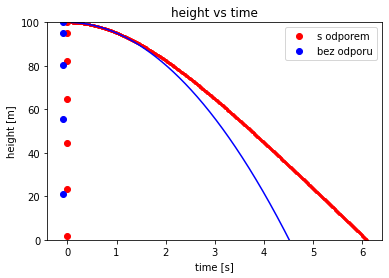

In [3]:
# mic nechame padat z vysky 100 m a jen ho upustime, tedy pocatecni rychlost nulova
y0 = 100
v0 = 0
# vynulujeme stopky a nastavime nas prirustek casu, zde setinu sekundy
t = 0
dt = 0.01
# parametry mice
m = 0.5
C = 0.5
r = 0.1
S = np.pi*r**2
# dalsi hodnoty
g = 9.8
rho = 1.3
# faktor v odporove sile si pro zjednoduseni oznacime jako k
k = 0.5*C*S*rho
print('k = ',k)
# inicializace
y = y0
v = v0
data = []
while y>0:
    a = -g + k*v*v/m
    v = v + a*dt
    y = y + v*dt
    t = t + dt
    # pridat do 'tabulky' dalsi radek obsahujici aktualni udaje t,y,v,a
    data.append([t,y,v,a])
# konverze tabulky do numpy array a rozdeleni na sloupce. Ve sloupcich mame casovou radu poloh, rychlosti a zrychleni
# jedna se nyni o pole cisel, coz reflektujeme tim, ze jsou tato pole oznacena dvojitym pismenem
tt,yy,vv,aa = np.hsplit(np.array(data),4)
# vypocitana poloha v case pomoci numericke simulace
plt.plot(tt,yy,'ro',markersize=2)
# teoreticka zavislost polohy na case bez odporu vzduchu
plt.plot(tt,y0-0.5*g*tt**2,'b-')
plt.xlabel('time [s]')
plt.ylabel('height [m]')
plt.ylim((0,y0))
#udelame vyber polohy kazdou sekundu a vykreslime
tt1 = tt[0:-1:np.int(1/dt)]
yy1 = yy[0:-1:np.int(1/dt)]
plt.plot(np.zeros(len(tt1)),yy1,'ro',label='s odporem')
plt.plot(np.zeros(len(tt1))-0.1,y0-0.5*g*tt1**2,'bo',label='bez odporu')
plt.title('height vs time')
plt.legend()
plt.show()


#### Rychlost v závislosti na čase

Text(0, 0.5, 'speed [m/s]')

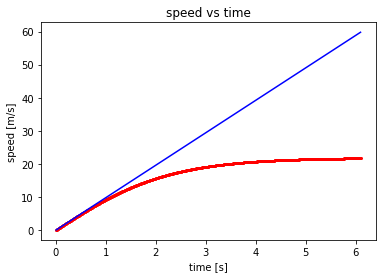

In [4]:
# vykresli numericky vypocitanou rychlost v zavislosti na case
plt.plot(tt,-vv,'ro',markersize=2)
# teoreticka zavislost polohy na case bez odporu vzduchu
plt.plot(tt,v0 + g*tt,'b-')
plt.title('speed vs time')
plt.xlabel('time [s]')
plt.ylabel('speed [m/s]')

### Cvičení 2
1) Změňte v předchozím kódu parametry tak, abychom řešili pád člověka bez padáku z výšky 2 km. Změnu hustoty vzduchu zatím neuvažujte. Zjistěte z grafu, jaká je mezní rychlost, tedy maximální rychlost, kterou padající dosáhne a jak dlouho asi trvá, než této maximální rychlosti dosáhne.


## Balistická křivka (pohyb ve 2D)
Nyní se budeme zabývat šikmým vrhem bez odporu vzduchu a s odporem vzduchu. Šikmý vrh je třeba atletický hod oštěpem nebo kladivem.

### Šikmý vrh bez odporu vzduchu
Na počátku je těleso vrženo s nějakým vektorem rychlosti $\vec{v_0} = (v_{x,0},v_{y,0})$, přičemž obě složky jsou kladné. Víme, že bez odporu vzduchu má trajektorie tvar paraboly. To snadno odvodíme:

Ve vodorovném směru (x) je pohyb rovnoměrný a platí
$$x(t) = v_{x,0} t \quad (1)$$
Ve svislém směru jde o pohyb s nějakou počáteční rychlostí směrem nahoru ($v_{y,0}$), přičemž na tento vertikální pohyb neustále podléhá konstantnímu zrychlení $g$ směrem dolů, a tedy
$$y(t) = y_0 + v_{y,0}t - \frac{1}{2}gt^2 \quad (2)$$
Čas $t$ můžeme vyjádřit z rovnice (1) jako $t = x/v_{x,0}$ a dosadit do (2):
$$y = y_0 + \frac{v_{y,0}}{v_{x,0}}x - \frac{g}{2 v^2_{x,0}}x^2$$
což je zjevně rovnice paraboly, u které bychom snadno uměli určit třeba polohu bodu, kdy je míč na své trajektorii nejvýš.



V případě numerické simulace pomocí postupných malých změn budeme postupovat vlastně úplně stejně jako v případě volného pádu, akorát tentokrát poloha, rychlost a zrychlení nebudou jen čísla, nýbrž dvousložkové vektory. Budeme značit polohový vektor $\vec{r} = (x,y)$ a poté přirozeně $\vec{v} = (v_x,v_y)$ a $\vec{a} = (a_x,a_y)$. 

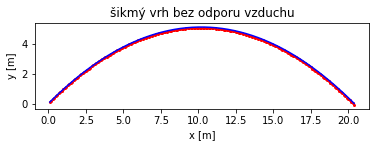

In [5]:
import numpy as np
import matplotlib.pyplot as plt
g = np.array([0,-9.8]) # gravitacni zrychleni zavedeme jako vektor
v0 = np.array([10,10]) # pocatecni vektor rychlosti (vx0,vy0). Slozku x dostaneme jako v0[0] a slozku y jako v0[1]
r0 = np.array([0,0])  # r0 znaci pocatecni polohovy vektor (x0,y0)
# vynulujeme stopky a nastavime nas prirustek casu, zde setinu sekundy
t = 0
dt = 0.01
# inicializace
r = r0
v = v0
data = []
# smycka
while r[1]>=0:
    a = g
    v = v + a*dt
    r = r + v*dt
    t = t + dt
    # pridat do 'tabulky' dalsi radek obsahujici aktualni udaje t,x,y,vx,vy,ax,ay
    data.append([t,r[0],r[1],v[0],v[1],a[0],a[1]])
# konverze tabulky do numpy array a rozdeleni na sloupce. Ve sloupcich mame casovou radu poloh, rychlosti a zrychleni
tt,xx,yy,vvx,vvy,aax,aay = np.hsplit(np.array(data),7)
# vypocitana poloha v case pomoci numericke simulace
plt.plot(xx,yy,'ro',markersize=2)
# teoreticky tvar trajektorie
plt.plot(xx,r0[1] + xx*v0[1]/v0[0] + xx*xx*g[1]/(2*v0[0]**2),'b-') # vsimnete si, ze g je definovano jako zaporne, takze mame ve vztahu +
plt.axis('scaled')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('šikmý vrh bez odporu vzduchu')
plt.show()


### Balistická křivka s odporem vzduchu

Odporovou sílu zahrneme podobně jako v případě svislého pádu, ale budeme si muset dát pozor na pár věcí. Budeme opět uvažovat odporovou sílu o velikosti $F_o = kv^2$, kde faktor $k$ jsme určili pro míč při svislém pádu jako $k\approx 0.01$. Klíčové zde je, že musíme odporovou sílu brát jako vektor, a že směr odporové síly je vždy opačný než směr rychlosti. Pak můžeme psát
$$ \vec{F_o} = -\frac{\vec{v}}{|v|} k|v|^2 = -k|v|{\vec{v}} $$
Absolutní hodnota $|v|$ značí velikost vektoru rychlosti, kterou počítáme ze složek pomocí Pythagorovy věty. Pokud však již známe pojem skalární součin, můžeme využít elegantní zápis $|v|=\sqrt{\vec{v}\cdot \vec{v}}$. To využijeme v našem kódu.



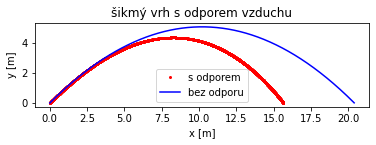

In [6]:
import numpy as np
import matplotlib.pyplot as plt
g = np.array([0,-9.8]) # gravitacni zrychleni jako vektor
m = 0.5 # hmotnost mice v kg
k = 0.01 # toto je koeficient v odporove sile, F = kv^2, odpovida priblizne hodnote pro nejaky typicky mic.
v0 = np.array([10,10]) # pocatecni vektor rychlosti (vx0,vy0). Slozku x dostaneme jako v0[0] a slozku y jako v0[1]
r0 = np.array([0,0])  # r0 znaci pocatecni polohovy vektor (x0,y0)
# vynulujeme stopky a nastavime nas prirustek casu, zde setinu sekundy
t = 0
dt = 0.001
# inicializace
r = r0
v = v0
data = []
# smycka
while r[1]>=0:
    Fo = -k*np.sqrt(v.dot(v))*v
    a = Fo/m + g
    v = v + a*dt
    r = r + v*dt
    t = t + dt
    # pridat do 'tabulky' dalsi radek obsahujici aktualni udaje t,x,y,vx,vy,ax,ay
    data.append([t,r[0],r[1],v[0],v[1],a[0],a[1]])
# konverze tabulky do numpy array a rozdeleni na sloupce. Ve sloupcich mame casovou radu poloh, rychlosti a zrychleni
tt,xx,yy,vvx,vvy,aax,aay = np.hsplit(np.array(data),7)
# vypocitana poloha v case pomoci numericke simulace
plt.plot(xx,yy,'ro',markersize=2,label='s odporem')
# teoreticky tvar trajektorie pro pripad bez odporu vzduchu
tt1 = np.arange(0,2*v0[1]/(-g[1]),dt)
plt.plot(v0[0]*tt1,r0[1] + v0[1]*tt1 + 0.5*g[1]*tt1**2,'b-',label='bez odporu')
plt.axis('scaled')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend()
plt.title('šikmý vrh s odporem vzduchu')
plt.show()

A ještě rozfázované polohy míče každou desetinu sekundy během letu.

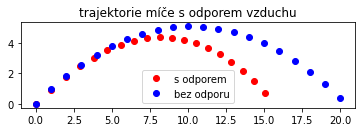

In [7]:
#udelame vyber polohy kazdou desetinu sekundu a vykreslime
sli = slice(0,-1,np.int(0.1/dt))
xx1 = xx[sli]
yy1 = yy[sli]
tt2 = tt1[sli]
plt.plot(xx1,yy1,'ro',label='s odporem')
plt.plot(tt2*v0[0],r0[1] + v0[1]*tt2  + 0.5*g[1]*tt2**2,'bo',label='bez odporu')
plt.title('trajektorie míče s odporem vzduchu')
plt.legend()
plt.axis('scaled')
plt.show()

### Cvičení 3
Dole je zkopírovaný kód pro výpočet šikmého vrhu s odporem vzduchu, avšak jsou v něm vynechány některé označené řádky. Zkuste řádky doplnit, aniž byste se hned dívali na předlohu výše.

In [95]:
import numpy as np
import matplotlib.pyplot as plt
# ..................... # gravitacni zrychleni jako vektor
m = 0.5 # hmotnost mice v kg
k = 0.01 # toto je koeficient v odporove sile, F = kv^2, odpovida priblizne hodnote pro nejaky typicky mic.
v0 = np.array([10,10]) # pocatecni vektor rychlosti (vx0,vy0). Slozku x dostaneme jako v0[0] a slozku y jako v0[1]
r0 = np.array([0,0])  # r0 znaci pocatecni polohovy vektor (x0,y0)
# vynulujeme stopky a nastavime nas prirustek casu, zde setinu sekundy
t = 0
# ..................... # nastaveni casoveho kroku
# inicializace
r = r0
v = v0
data = []
# smycka
# ..................... # smycka, ktera se provadi, dokud je vyska vetsi nebo rovna 0. Vyska je druha slozka polohoveho vektoru.
    Fo = -k*np.sqrt(v.dot(v))*v
    # ..................... # vypocet vektoru zrychleni a
    v = v + a*dt
    # ..................... # aktualizace polohoveho vektoru r
    t = t + dt
    # pridat do 'tabulky' dalsi radek obsahujici aktualni udaje t,x,y,vx,vy,ax,ay
    data.append([t,r[0],r[1],v[0],v[1],a[0],a[1]])
# konverze tabulky do numpy array a rozdeleni na sloupce. Ve sloupcich mame casovou radu poloh, rychlosti a zrychleni
tt,xx,yy,vvx,vvy,aax,aay = np.hsplit(np.array(data),7)
# vypocitana poloha v case pomoci numericke simulace
# ..................... # vykresleni grafu zavislosti polohy y na poloze x. Ty jsou obsazeny v polich yy a xx 
plt.show()

IndentationError: unexpected indent (<ipython-input-95-a9a1db3c5679>, line 17)

## Jde to i snáze - funkce odeint

To, co jsme dosud prováděli ve smyčce *while* byl úplně nejjednodušší způsob takzvané integrace (někdy se také nazývá Newtonova metoda). Mohli jste si ale všimnout, že když časový krok není dostatečně malý, tak tento způsob výpočtu pohybu vede k postupnému navyšování chyby. Toto je problém u jakékoli simulace, ale Newtonova metoda je na vznik odchylek značně náchylná. V praxi se proto používají chytřejší způsoby integrace. Přímo v Pythonu je k účelu integrace určena funkce *odeint* (ODE značí 'ordinary differential equation' a 'int' značí integraci. Nyní si ukážeme, jak lze předchozí výpočet balistické křivky s odporem vzduchu přepsat pomocí této funkce *odeint*. 

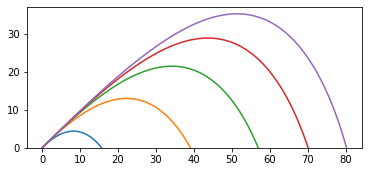

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def rovnice_pohybu(rv,t,m,k,g):
    # tato funkce ma vracet hodnoty derivace jednotlivych promennych, tedy v nasem pripade 4 prvkove pole obsahujici
    # [dx/dt, dy/dt, dvx/dt, dvy/dt]
    # na vstupu funkce je 4-prvkove pole rv, ktere obsahuje udaje o aktualni poloze a rychlosti: [x,y,vx,vy]
    r = rv[0:2] # pole rv obsahuje [rx,ry,vx,vy] a my z nej bereme prvni dve cisla, tedy vektor polohy
    v = rv[2:4] # pole rv obsahuje [rx,ry,vx,vy] a my z nej bereme prvni druha dve cisla, tedy vektor rychlosti
    Fo = -k*np.sqrt(v.dot(v))*v
    a = Fo/m + g
    drdt = v
    dvdt = a
    return [drdt[0],drdt[1],dvdt[0],dvdt[1]] # ještě snazší by bylo psát return[*drdt,*dvdt], to je ale trochu obskurní zápis

g = np.array([0,-9.8]) # gravitacni zrychleni jako vektor
m = 0.5 # hmotnost mice v kg
k = 0.01 # toto je koeficient v odporove sile, F = kv^2, odpovida priblizne hodnote pro nejaky typicky mic.
t = np.arange(0,10,0.01) # musime definovat, v jakych casech chceme polohy a rychlosti vypocitat. Tedy i predem definujeme, do jakeho casu se ma pocitat, bez ohledu na to, zda mic uz dopadl nebo ne.
r0 = np.array([0,0])  # r0 znaci pocatecni polohovy vektor (x0,y0)
for v0xy in np.arange(10,51,10):
    v0 = np.array([v0xy,v0xy]) # pocatecni vektor rychlosti (vx0,vy0). Slozku x dostaneme jako v0[0] a slozku y jako v0[1]
    D = odeint(rovnice_pohybu,[*r0,*v0],t,args=(m,k,g))
    nadzemi = D[:,1]>=0
    plt.plot(D[nadzemi,0],D[nadzemi,1],label='v$_{0,x}$=v$_{0,y}$='+str(v0[0])+' m/s')
plt.axis('scaled')
plt.ylim(bottom=0)
#plt.legend(loc='upper left')
plt.show()


### Cvičení 4
Prohlédněte si předchozí kód a vysvětlete, co že to vlastně počítá a zobrazuje.

# Dependencies

In [10]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to add
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

numpy==1.19.2
matplotlib==3.3.4
